In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
import pandas_datareader as web


In [4]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2022, 1, 1)



company = 'TSLA'

data = web.DataReader(company, 'yahoo', start, end)
data["Close"] = pd.to_numeric(data.Close, errors="coerce")
data = data.dropna()
trainData = data.iloc[:, 4:5].values


print(trainData)

[[13921500.]
 [ 9451500.]
 [15082500.]
 ...
 [56154000.]
 [47040900.]
 [40733700.]]


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [6]:
sc = MinMaxScaler (feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2517, 1)

In [7]:
X_train =[]
y_train =[]
for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
                             
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape (X_train, (X_train.shape[0],X_train.shape [1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add (LSTM(units=100, return_sequences = True))
model.add (Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam', loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0048 - 11s/epoch - 322ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0041 - 4s/epoch - 111ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0039 - 4s/epoch - 110ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0040 - 4s/epoch - 107ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0038 - 4s/epoch - 110ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0038 - 4s/epoch - 110ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0038 - 4s/epoch - 113ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0037 - 4s/epoch - 112ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0039 - 4s/epoch - 110ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0035 - 4s/epoch - 115ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0036 - 4s/epoch - 116ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0036 - 4s/epoch - 110ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0035 - 4s/epoch - 112ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0035 - 4s/epoch - 108ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0033 - 4s/epoch - 110ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0033 - 4s/epoch - 109ms/step
Epoch 17/20
35/

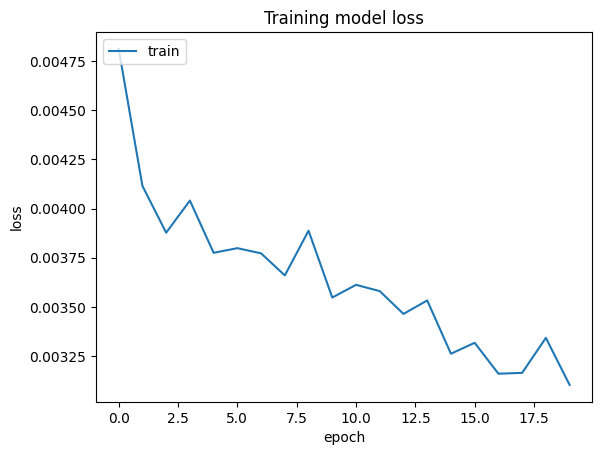

In [11]:
plt.plot(hist.history['loss'])
plt.title("Training model loss")
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
start_test = dt.datetime(2022, 1, 1)
end_test = dt.datetime(2022, 10, 1)

test_data = web.DataReader(company, 'yahoo', start_test, end_test)
test_data["Close"] = pd.to_numeric(test_data.Close, errors="coerce")
test_data = test_data.dropna()
test_data = test_data.iloc[:, 4:5]
y_test = test_data.iloc[60:, 0:].values

#input array for the model
inputClosing = test_data.iloc[:, 0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len (test_data)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array (X_test)
X_test = np.reshape (X_test, (X_test.shape[0],X_test.shape [1],1))
X_test.shape

(129, 60, 1)

In [13]:
y_pred = model.predict(X_test)

5/5 [==============================] - 2s 28ms/step


In [14]:
predicted_price = sc.inverse_transform(y_pred)

[[7.361490e+07]
 [5.986500e+07]
 [4.899270e+07]
 [5.426310e+07]
 [8.203590e+07]
 [8.007510e+07]
 [8.934840e+07]
 [7.944720e+07]
 [5.501370e+07]
 [5.935710e+07]
 [6.597600e+07]
 [5.512110e+07]
 [5.842230e+07]
 [5.171520e+07]
 [4.984770e+07]
 [7.071120e+07]
 [1.054164e+08]
 [6.969660e+07]
 [6.834120e+07]
 [1.361337e+08]
 [7.695630e+07]
 [1.249485e+08]
 [8.813310e+07]
 [7.578150e+07]
 [6.370950e+07]
 [8.164380e+07]
 [9.251910e+07]
 [7.290300e+07]
 [9.081030e+07]
 [8.440170e+07]
 [9.722460e+07]
 [1.403130e+08]
 [9.215070e+07]
 [8.609850e+07]
 [8.023620e+07]
 [8.781180e+07]
 [9.029670e+07]
 [1.449732e+08]
 [8.890350e+07]
 [8.909250e+07]
 [9.213930e+07]
 [1.060032e+08]
 [8.929500e+07]
 [1.019145e+08]
 [7.724790e+07]
 [9.347310e+07]
 [1.123938e+08]
 [8.420460e+07]
 [7.280850e+07]
 [7.621050e+07]
 [9.649140e+07]
 [9.753660e+07]
 [1.027674e+08]
 [9.798870e+07]
 [1.191318e+08]
 [1.073907e+08]
 [9.264180e+07]
 [1.227930e+08]
 [1.011075e+08]
 [1.042026e+08]
 [9.577080e+07]
 [8.917830e+07]
 [9.0391

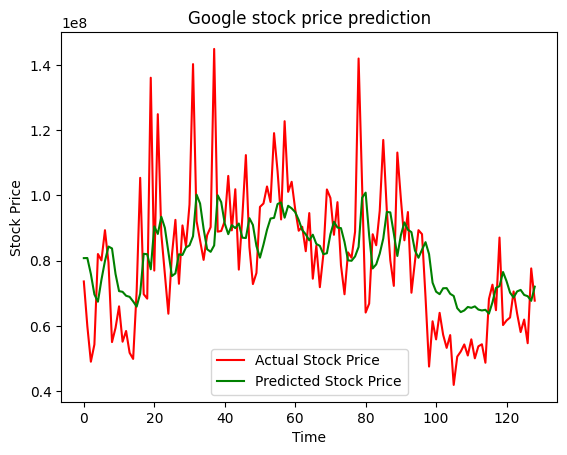

In [19]:
plt.plot(y_test, color='red', label= "Actual Stock Price")
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
print(y_test)
plt. title('Google stock price prediction')
plt.xlabel ('Time')
plt.ylabel('Stock Price')
plt.legend() 
plt.show()

In [16]:
print(y_test)

[[7.361490e+07]
 [5.986500e+07]
 [4.899270e+07]
 [5.426310e+07]
 [8.203590e+07]
 [8.007510e+07]
 [8.934840e+07]
 [7.944720e+07]
 [5.501370e+07]
 [5.935710e+07]
 [6.597600e+07]
 [5.512110e+07]
 [5.842230e+07]
 [5.171520e+07]
 [4.984770e+07]
 [7.071120e+07]
 [1.054164e+08]
 [6.969660e+07]
 [6.834120e+07]
 [1.361337e+08]
 [7.695630e+07]
 [1.249485e+08]
 [8.813310e+07]
 [7.578150e+07]
 [6.370950e+07]
 [8.164380e+07]
 [9.251910e+07]
 [7.290300e+07]
 [9.081030e+07]
 [8.440170e+07]
 [9.722460e+07]
 [1.403130e+08]
 [9.215070e+07]
 [8.609850e+07]
 [8.023620e+07]
 [8.781180e+07]
 [9.029670e+07]
 [1.449732e+08]
 [8.890350e+07]
 [8.909250e+07]
 [9.213930e+07]
 [1.060032e+08]
 [8.929500e+07]
 [1.019145e+08]
 [7.724790e+07]
 [9.347310e+07]
 [1.123938e+08]
 [8.420460e+07]
 [7.280850e+07]
 [7.621050e+07]
 [9.649140e+07]
 [9.753660e+07]
 [1.027674e+08]
 [9.798870e+07]
 [1.191318e+08]
 [1.073907e+08]
 [9.264180e+07]
 [1.227930e+08]
 [1.011075e+08]
 [1.042026e+08]
 [9.577080e+07]
 [8.917830e+07]
 [9.0391